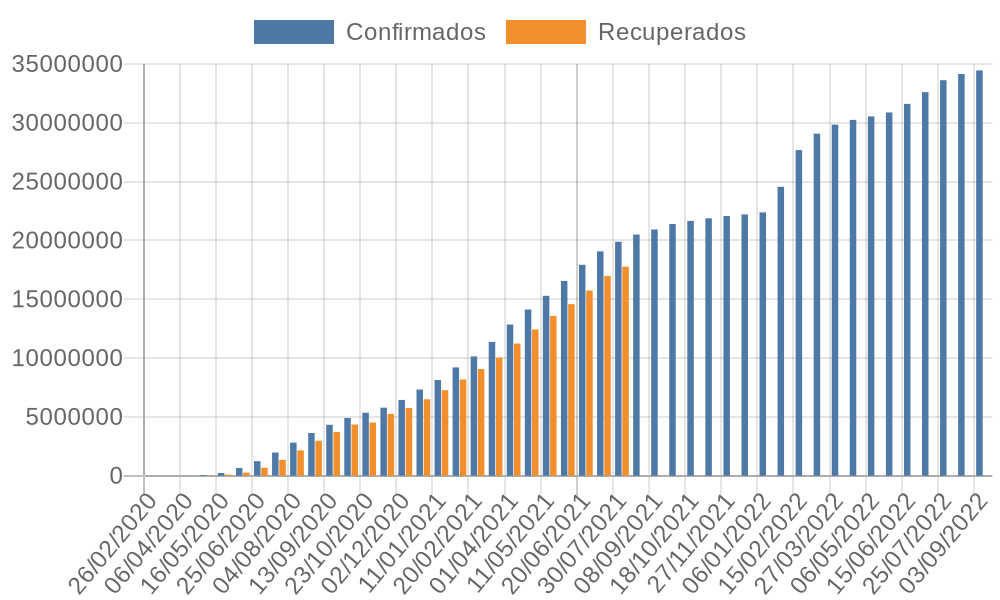

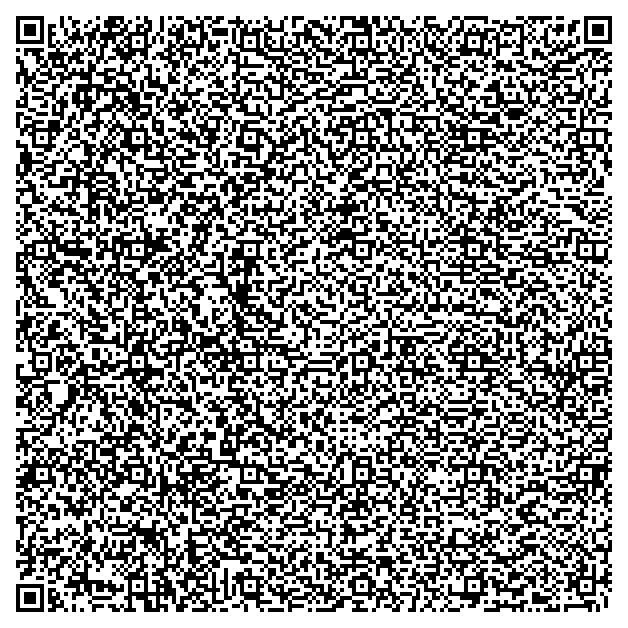

In [7]:
import requests as r
import datetime as dt
import csv
from PIL import Image
from IPython.display import display
from urllib.parse import quote


url = 'https://api.covid19api.com/dayone/country/brazil'

resp = r.get(url)

request_code = resp.status_code

(request_code)

raw_data = resp.json()

(raw_data[0])

final_data = []
for obs in raw_data:
    final_data.append([obs['Confirmed'], obs['Deaths'], obs['Recovered'], obs['Active'], obs['Date']])

final_data.insert(0, ['CONFIRMADOS', 'OBITOS', 'RECUPERADOS', 'ATIVOS', 'DATA'])

CONFIRMADOS = 0
OBITOS = 1
RECUPERADOS = 2
ATIVOS = 3
DATA = 4

for i in range(1, len(final_data)):
    final_data[i][DATA] = final_data[i][DATA][:10]

with open('brazil-covid.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerows(final_data)

for i in range(1, len(final_data)):
    final_data[i][DATA] = dt.datetime.strptime(final_data[i][DATA], '%Y-%m-%d')

(final_data)


def get_datasets(y, labels):
    if type(y[0]) == list:
        datasets = []
        for i in range(len(y)):
            datasets.append({
                'label': labels[i],
                'data': y[i]
            })
        return datasets
    else:
        return [
            {
                'label': labels[0],
                'data': y
            }
        ]


def set_title(title=''):
    if title != '':
        display = 'true'
    else:
        display = 'false'
    return {
        'title': title,
        'display': display
    }


def create_chart(x, y, labels, kind='bar', title=''):
    datasets = get_datasets(y, labels)
    options = set_title(title)

    chart = {
        'type': kind,
        'data': {
            'labels': x,
            'datasets': datasets
        },
        'options': options
    }
    return chart


def get_api_chart(chart):
    url_base = 'https://quickchart.io/chart'
    resp = r.get(f'{url_base}?c={str(chart)}')
    return resp.content


def save_image(path, content):
    with open(path, 'wb') as image:
        image.write(content)


def display_image(path):
    img_pil = Image.open(path)
    display(img_pil)

y_data_1 = []
for obs in final_data[1::20]:
    y_data_1.append(obs[CONFIRMADOS])

y_data_2 = []
for obs in final_data[1::20]:
    y_data_2.append(obs[RECUPERADOS])

labels = ['Confirmados', 'Recuperados']

x = []
for obs in final_data[1::20]:
    x.append(obs[DATA].strftime('%d/%m/%Y'))

chart = create_chart(x, [y_data_1, y_data_2], labels, title='Gráfico Confirmados VS Recuperado')
chart_content = get_api_chart(chart)
save_image('Gráfico-Covid.png', chart_content)
display_image('Gráfico-Covid.png')

def get_api_qrcore(link):
    text = quote(link)
    url_base = 'https://quickchart.io/qr'
    resp = r.get(f'{url_base}?text={text}')
    return resp.content


url_base = 'https://quickchart.io/chart'
link = f'{url_base}?c={str(chart)}'
save_image('qr-code.png', get_api_qrcore(link))
display_image('qr-code.png')